In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 22s 0us/step


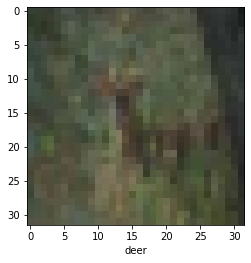

In [3]:
# Let's look at a one image
IMG_INDEX = 10 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary() # Let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs= 10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5333 - accuracy: 0.4435 - val_loss: 1.3065 - val_accuracy: 0.5262
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1631 - accuracy: 0.5897 - val_loss: 1.0723 - val_accuracy: 0.6201
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0189 - accuracy: 0.6409 - val_loss: 0.9977 - val_accuracy: 0.6460
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9230 - accuracy: 0.6759 - val_loss: 0.9486 - val_accuracy: 0.6628
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8531 - accuracy: 0.7008 - val_loss: 0.9351 - val_accuracy: 0.6771
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7994 - accuracy: 0.7212 - val_loss: 0.8976 - val_accuracy: 0.6858
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7525 - accuracy: 0.7359 - val_loss: 0.8559 - val_ac

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8513 - accuracy: 0.7070
0.7070000171661377


In [17]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

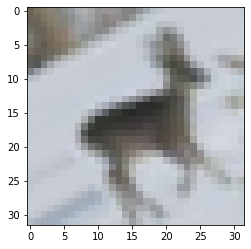

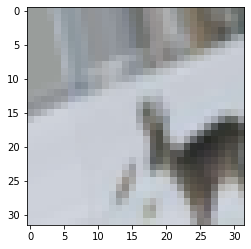

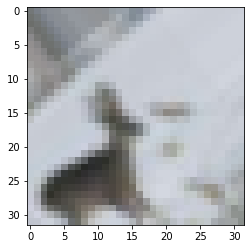

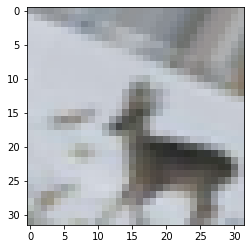

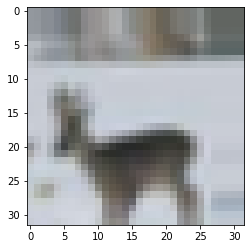

In [18]:


# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

In [19]:
from keras.preprocessing.image import img_to_array

In [20]:
image = test_images[10]

In [21]:
def predict(model, image):
  class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                    'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  return predicted_class



In [22]:
image = train_images[10]
predict(model, image)

'Deer'

In [23]:
model.save("simple_image_classification.h5")

In [24]:
new_model = tf.keras.models.load_model("simple_image_classification.h5")